<h1>Efecto fotoeléctrico</h1>

<h2>Espectro de emisión del mercurio</h2>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
from scipy.odr import Model, Data, ODR

plt.rcParams.update({
   "text.usetex": True,
   "font.family": "serif",
})

In [10]:
# df = pd.read_csv("espectro-mercurio.csv")
df = pd.read_csv("espectro-mercurio-2nd.csv")

wavelength = df["Longitud de onda"]
current = df["Corriente"] * 1e-8

In [13]:
df.head()

,Longitud de onda,Corriente
0,300,3.0
1,310,3.0
2,320,3.0
3,330,3.0
4,340,3.0


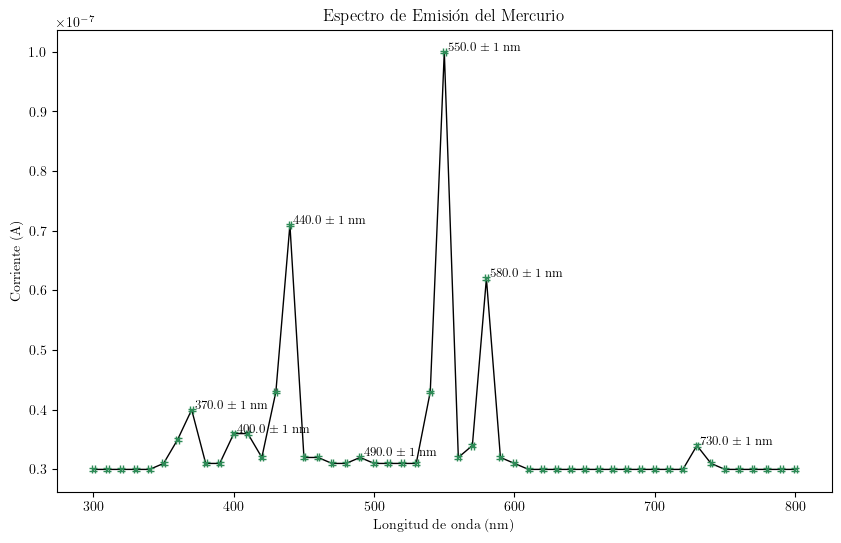

In [14]:
# Incertidumbres
error_current = 0.02e-8  # A (2e-10)
error_wavelength = 1  # nm

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(wavelength, current, color='black', lw=1)

# Barras de error
ax.errorbar(wavelength, current, xerr=error_wavelength, yerr=error_current, capsize=3, fmt="o", c="seagreen", ms=0.5)

# Identificar y etiquetar los picos
peaks, _ = find_peaks(current)
for color, peak in enumerate(peaks):
    lambda_peak = wavelength[peak]
    ax.text(lambda_peak + 2.5, current[peak], f"${{{lambda_peak:.1f} \\pm {error_wavelength}}}$ nm", ha='left', va='bottom', fontsize=9, color='black')

ax.set_xlabel("Longitud de onda (nm)")
ax.set_ylabel("Corriente (A)")
ax.set_title("Espectro de Emisión del Mercurio")

fig.savefig("espectro-mercurio.jpg", dpi=1000)

plt.show()


<h2>Gráfica $I$ vs $V$</h2>

In [38]:
def corriente_voltaje(archivo):
    df = pd.read_csv(archivo)

    # Definir voltaje y corriente con el factor de corrección
    voltaje = df["Voltaje"]
    corriente = (df["Corriente"] * 3) * 1e-8  # Ajuste por multiplicador

    # Encontrar el cruce por interpolación lineal
    sign_change = np.where(np.diff(np.sign(corriente)))[0]
    if len(sign_change) > 0:
        idx = sign_change[0]  # Primer cruce de signo
        v1, v2 = voltaje.iloc[idx], voltaje.iloc[idx + 1]
        i1, i2 = corriente.iloc[idx], corriente.iloc[idx + 1]

        # Interpolación lineal: V_intercept = V1 - (I1 * (V2 - V1) / (I2 - I1))
        v_cero = v1 - (i1 * (v2 - v1) / (i2 - i1))


        # Graficar datos y punto de corte
        ax.scatter(voltaje, corriente, label=f"{archivo[:-4]}")
        ax.scatter(v_cero, 0, color="red", zorder=3)
        ax.text(v_cero, 0, f"{v_cero:.4f} V", fontsize=10, verticalalignment="bottom", horizontalalignment="right", color="red")

    else:
        print(f"No se encontró cruce de corriente cero en {archivo}")

<h3>Longitud de onda $370$ nm</h3>

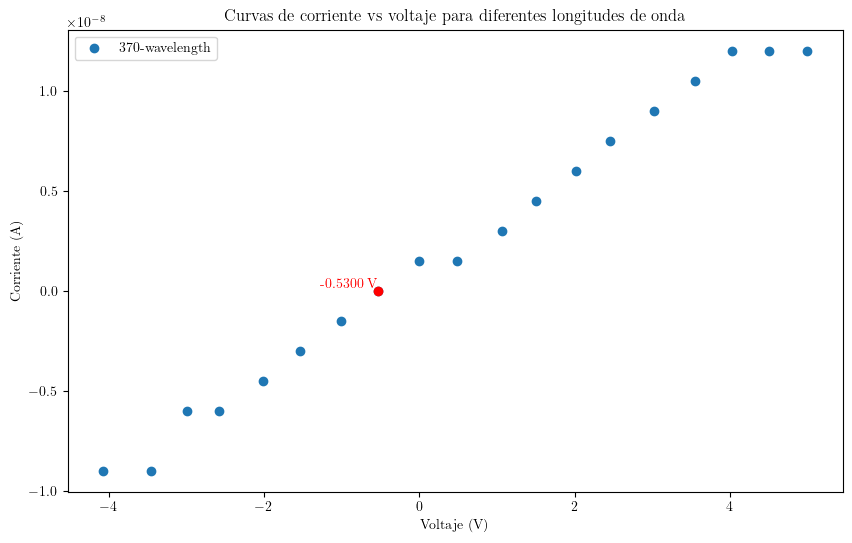

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
corriente_voltaje("370-wavelength.csv")
ax.set_xlabel("Voltaje (V)")
ax.set_ylabel("Corriente (A)")
ax.legend()
plt.title("Curvas de corriente vs voltaje para diferentes longitudes de onda")
plt.show()

<h3>Longitud de onda $440$ nm</h3>

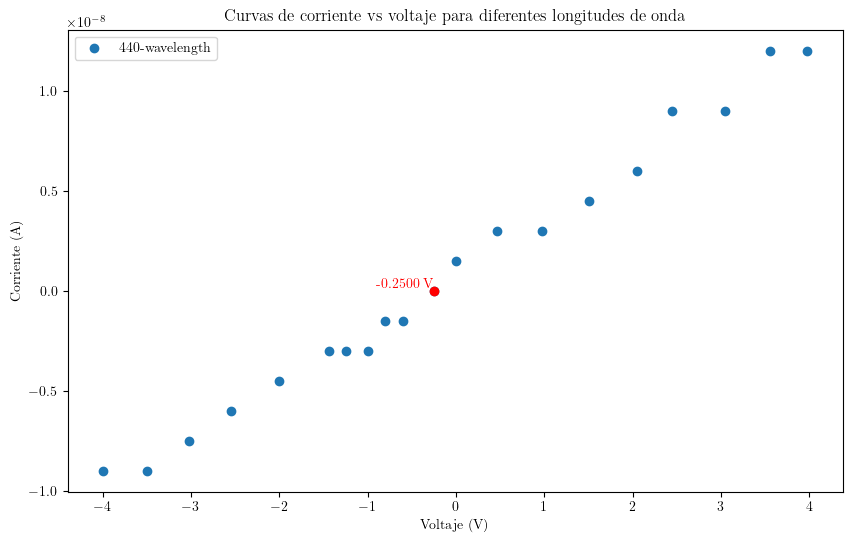

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
corriente_voltaje("440-wavelength.csv")
ax.set_xlabel("Voltaje (V)")
ax.set_ylabel("Corriente (A)")
ax.legend()
plt.title("Curvas de corriente vs voltaje para diferentes longitudes de onda")
plt.show()

<h3>Longitud de onda $550$ nm</h3>

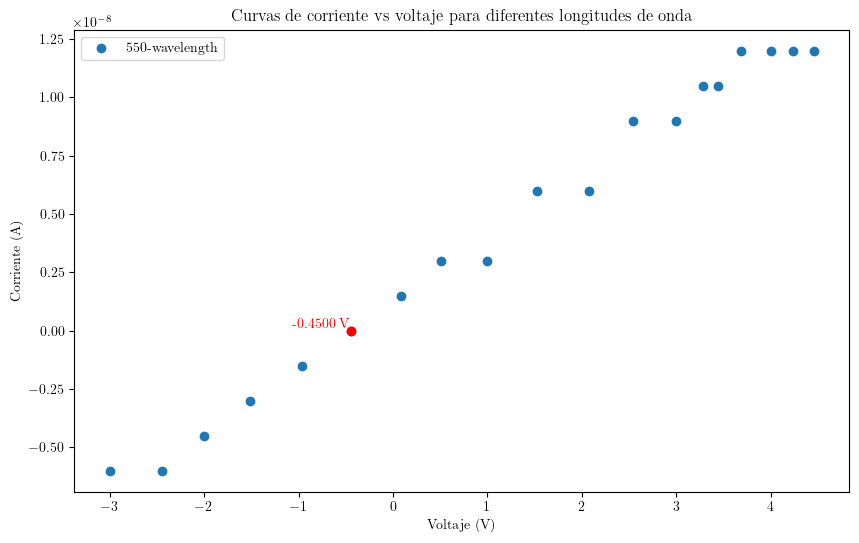

In [41]:
fig, ax = plt.subplots(figsize=(10, 6))
corriente_voltaje("550-wavelength.csv")
ax.set_xlabel("Voltaje (V)")
ax.set_ylabel("Corriente (A)")
ax.legend()
plt.title("Curvas de corriente vs voltaje para diferentes longitudes de onda")
plt.show()

<h3>Longitud de onda $580$ nm</h3>

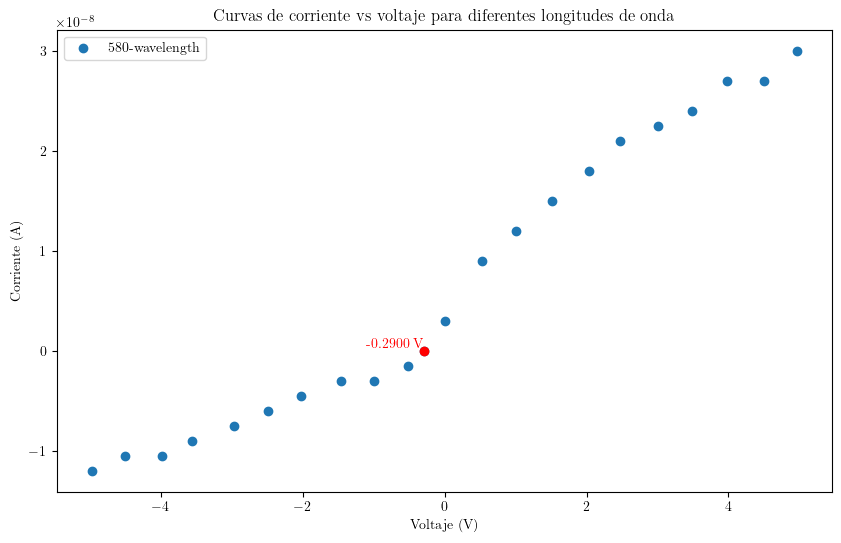

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))
corriente_voltaje("580-wavelength.csv")
ax.set_xlabel("Voltaje (V)")
ax.set_ylabel("Corriente (A)")
ax.legend()
plt.title("Curvas de corriente vs voltaje para diferentes longitudes de onda")
plt.show()

<h3>Longitud de onda $73
    0$ nm</h3>

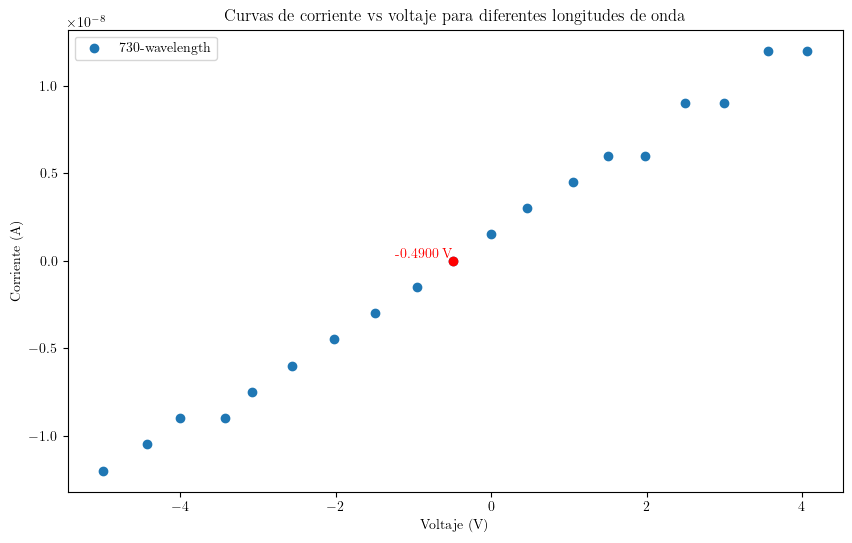

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))
corriente_voltaje("730-wavelength.csv")
ax.set_xlabel("Voltaje (V)")
ax.set_ylabel("Corriente (A)")
ax.legend()
plt.title("Curvas de corriente vs voltaje para diferentes longitudes de onda")
plt.show()

<h2>Gráfica $V_{0}$ vs $\nu$</h2>